## Confusion matrix

Total f1 0.827174258403184
Accuracy 0.8466036206430695


<AxesSubplot:>

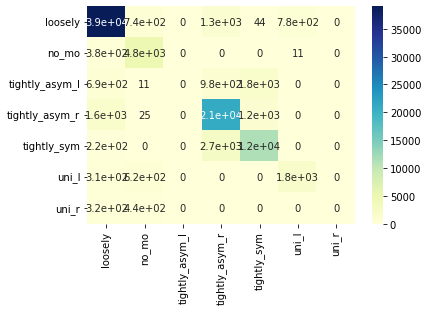

In [1]:
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sn
import csv
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score
directory = '/home/krebs/mounts/share/Vicon_Data/Vicon/OML/Bimanual_Manipulation_Dataset_Motion_Primitives/1723/BimanualSegmentation/Evaluation'
prediction=[]
true=[]
for dir in os.listdir(directory):
    with open(directory + "/" + dir + "/prediction.csv", newline='') as csvfile:
        prediction += list(csv.reader(csvfile))
    with open(directory + "/" + dir + "/true.csv", newline='') as csvfile:
        true += list(csv.reader(csvfile))     

total_f1 = f1_score(true, prediction, average='weighted')
print("Total f1 {}".format(total_f1))
acc = accuracy_score(true, prediction)
print("Accuracy {}".format(acc))
cm = confusion_matrix(true, prediction)
y_axis_labels = ["loosely","no_mo","tightly_asym_l","tightly_asym_r","tightly_sym","uni_l","uni_r" ]
sn.heatmap(cm, annot=True, xticklabels=y_axis_labels, yticklabels=y_axis_labels, cmap="YlGnBu")

## Normalized confusion matrix

/home/krebs/reposTaxonomy/research/bimanual_category_classification/scripts/python/venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


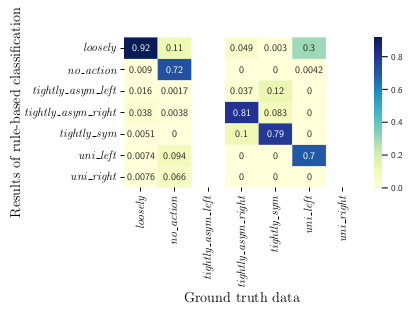

In [2]:
cm_norm = []
cmT = np.transpose(cm)
for i in range(len(cm)):
    if np.sum(cmT[i])==0:
        cm_norm.append(np.ndarray.tolist(cmT[i]*(-1)/cmT[i].tolist()))
    else:
        cm_norm.append(np.ndarray.tolist(cmT[i]/np.sum(cmT[i])))
cm_norm_t = np.transpose(cm_norm)
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.size': 22,
    'text.usetex': True,
    'pgf.rcfonts': True,
    'mathtext.fontset': 'stix',
    'font.family': 'STIXGeneral',
})

fig = plt.figure(1)
plt.xlabel("test")
sn.set(font_scale=0.8, rc={'text.usetex' : False})
y_axis_labels = ['$\mathit{loosely}$','$\mathit{no\_action}$','$\mathit{tightly\_asym\_left}$','$\mathit{tightly\_asym\_right}$','$\mathit{tightly\_sym}$','$\mathit{uni\_left}$','$\mathit{uni\_right}$']
test = sn.heatmap(cm_norm_t, annot=True, xticklabels=y_axis_labels, yticklabels=y_axis_labels, cmap="YlGnBu")
test.set_xticklabels(y_axis_labels, fontsize = 12)
test.set_yticklabels(y_axis_labels, fontsize = 12)
test.set_xlabel("Ground truth data", fontsize = 14)
test.set_ylabel("Results of rule-based classification", fontsize = 14)
fig.tight_layout()
fig.savefig("plots/normalized_confusion_matrix.pdf", dpi=400)

## Category occurence in manually labeled ground truth data

In [3]:
class_frequencies = []
class_frequencies_norm = []
for i in cmT:
    class_frequencies.append(np.sum(i))
    #print(np.sum(i))
    
for i in class_frequencies:
    class_frequencies_norm.append(i/np.sum(class_frequencies))
    print(i/np.sum(class_frequencies))

0.46017833018103216
0.07138611186165901
0.0
0.28192380437719533
0.15811942718184274
0.02839232639827074
0.0


0.0
0.0
2.839232639827074
7.138611186165901
15.811942718184275
28.19238043771953
46.01783301810322


/home/krebs/reposTaxonomy/research/bimanual_category_classification/scripts/python/venv/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.


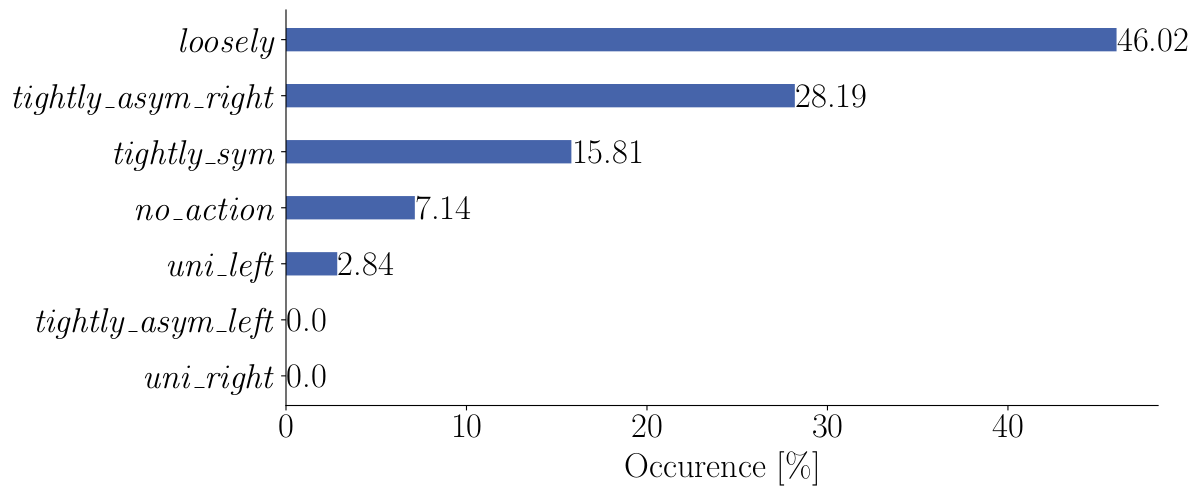

In [4]:
import numpy as np
import matplotlib
matplotlib.use('Agg')
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
import matplotlib.pyplot as plt
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    #'font.family': 'serif',
    'font.size': 8,
    'text.usetex': True,
    'pgf.rcfonts': True,
    'mathtext.fontset': 'stix',
    'font.family': 'STIXGeneral',
})
def autolabel(rects):
    for rect in rects:
        width = rect.get_width()
        print(width)
        ax.text(width + 0.01, rect.get_y() + rect.get_height()/2., 
                round(width, 2),
                ha='left', va='center', fontsize=40)


class_frequencies_norm_sorted = sorted(class_frequencies_norm, reverse=False)
ind = np.arange(len(class_frequencies_norm_sorted))
ind2 = np.arange(len(class_frequencies_norm_sorted)+1)
Classes = ['$\mathit{loosely}$','$\mathit{tightly\_asym\_right}$','$\mathit{tightly\_sym}$','$\mathit{no\_action}$','$\mathit{uni\_left}$','$\mathit{tightly\_asym\_left}$','$\mathit{uni\_right}$']
Classes.reverse()
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(12)
width = 0.025  
size = 0.06
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.set_frame_on(True)
right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)
class_frequencies_norm_sorted_percent = [x * 100 for x in class_frequencies_norm_sorted]
bar1 = ax.barh(ind*size, class_frequencies_norm_sorted_percent, width, color='#4664AA')
autolabel(bar1)
plt.xlabel('Occurence [%]', fontsize=40)
ax.tick_params(axis='both', which='major', labelsize=40, color='black')
ax.set_yticks(ind*size)
ax.set_yticklabels(Classes)

plt.show()
fig.tight_layout()
fig.savefig("plots/category_occurence.pdf", dpi=400)